In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,roc_curve,roc_auc_score,recall_score,classification_report
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

In [ ]:
Path = "drive/My Drive/NSL_KDD"

In [ ]:
nsl_train = pd.read_csv(Path +"/kdd_train.csv" ,sep="," , encoding="utf-8")

In [ ]:
nsl_train.shape

(125973, 42)

In [ ]:
nsl_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [ ]:
nsl_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
nsl_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
nsl_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-32-35ebd7c72923>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=sns.heatmap(nsl_train.corr(), annot=True,cmap ='RdYlGn')


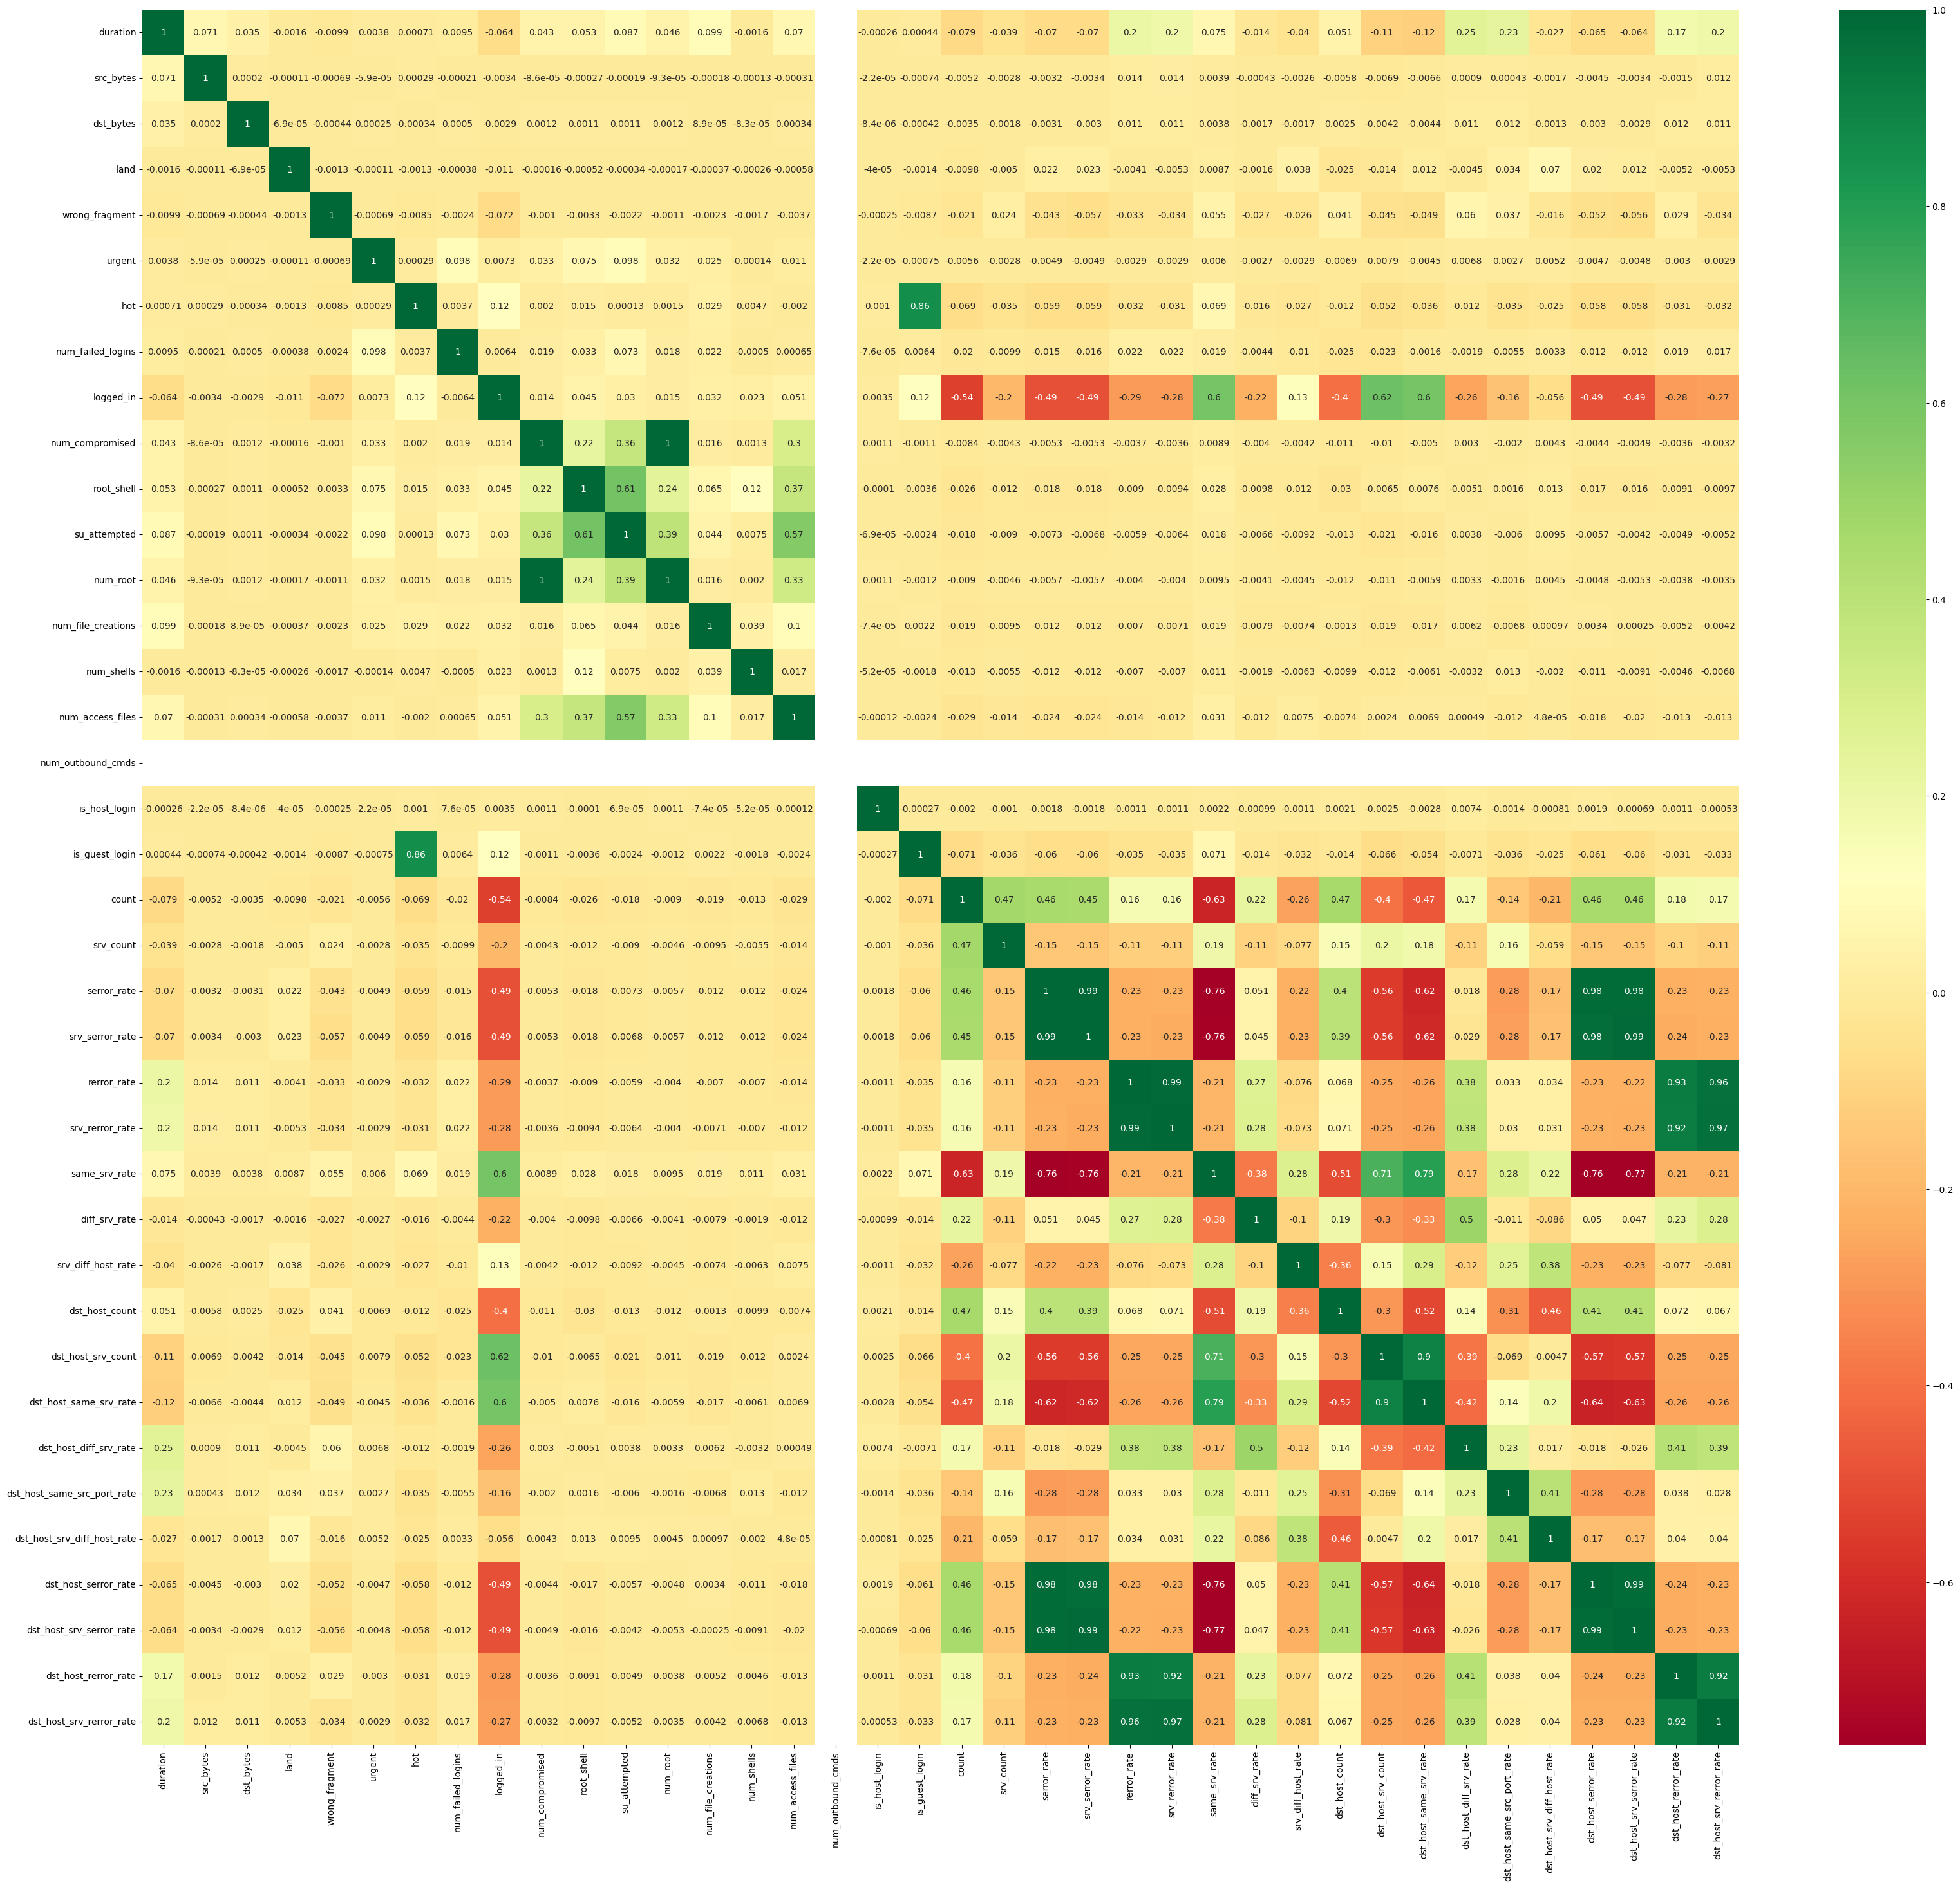

In [ ]:
plt.figure(figsize=(40,35))
p=sns.heatmap(nsl_train.corr(), annot=True,cmap ='RdYlGn')  

In [ ]:
data_train = nsl_train.copy()

In [ ]:
data_train.duplicated().sum()

0

In [ ]:
#A function to calculate and print out the missing value and it percentage 
def calculate_null_values(dataframe):
    d_frame = dataframe
    # get the sum of the null value of  each column 
    d_frame_null_values = pd.DataFrame(dataframe.isna().sum())
    # reset the dataframe index
    d_frame_null_values.reset_index(inplace=True)
    # add colume header to the dataframe
    d_frame_null_values.columns = ['Field_names', 'Null_value']
    #calculate the percentage of null or missing values 
    d_frame_null_value_percentage = dataframe.isnull().sum() / len(dataframe) * 100
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_value_percentage.reset_index(inplace=True)
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_values['Null_values_percentage'] = d_frame_null_value_percentage[0]
    return d_frame_null_values
    

In [ ]:
calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,duration,0,0.0
1,protocol_type,0,0.0
2,service,0,0.0
3,flag,0,0.0
4,src_bytes,0,0.0
5,dst_bytes,0,0.0
6,land,0,0.0
7,wrong_fragment,0,0.0
8,urgent,0,0.0
9,hot,0,0.0


In [ ]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [ ]:
v_counts(data_train)

0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: duration, Length: 2981, dtype: int64
_____________________________________________________________________________
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
_____________________________________________________________________________
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64
_____________________________________________________________________________
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64
__________________

In [ ]:
#transfer the column "labels" to only two classes , normal and atttck
# any thing not normal is attack 

list1 = data_train.labels.unique()
for i in list1:
    if i != 'normal':
        data_train.labels = data_train.labels.str.replace(i,'attack')

In [ ]:
v_counts(data_train)

0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: duration, Length: 2981, dtype: int64
_____________________________________________________________________________
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
_____________________________________________________________________________
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64
_____________________________________________________________________________
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64
__________________

<Axes: xlabel='labels', ylabel='count'>

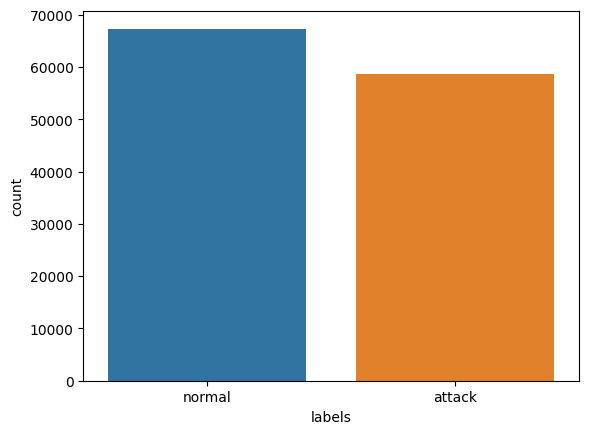

In [ ]:
sns.countplot(x=data_train['labels'])

In [ ]:
l_encoder = LabelEncoder()

In [ ]:
data_train['protocol_type'] = l_encoder.fit_transform(data_train['protocol_type'])
data_train['service'] = l_encoder.fit_transform(data_train['service'])
data_train['flag'] = l_encoder.fit_transform(data_train['flag'])
data_train['labels'] = l_encoder.fit_transform(data_train['labels'])

In [ ]:
v_counts(data_train)

0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: duration, Length: 2981, dtype: int64
_____________________________________________________________________________
1    102689
2     14993
0      8291
Name: protocol_type, dtype: int64
_____________________________________________________________________________
24    40338
49    21853
12     9043
54     7313
20     6860
      ...  
61        3
27        2
3         2
22        2
25        1
Name: service, Length: 70, dtype: int64
_____________________________________________________________________________
9     74945
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: flag, dtype: int64
_____________________________________________________________________________
0        49392
8         3691
1         2432
44        2334
45        

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  int64  
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

SPLIT THE DATA


In [ ]:
x = data_train.drop(['labels'] , axis=1).values
y = data_train['labels'].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.3 , random_state= 42)

In [ ]:
print(x_train.shape , x_test.shape)

(88181, 41) (37792, 41)


DATA SCALLING

In [ ]:
scalar = StandardScaler()

In [ ]:
x_train = scalar.fit_transform(x_train)

In [ ]:
x_test = scalar.fit_transform(x_test)

In [ ]:
print(x_train.shape , x_test.shape)

(88181, 41) (37792, 41)


SVM model
Run SVM with default hyperparameters

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

RBF

In [ ]:
# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)

print('Training set score: {:.4f}'.format(svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(x_test, y_test)))

Training set score: 0.9925
Test set score: 0.9911


In [ ]:
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(20)

,Y_test,Y_pred
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


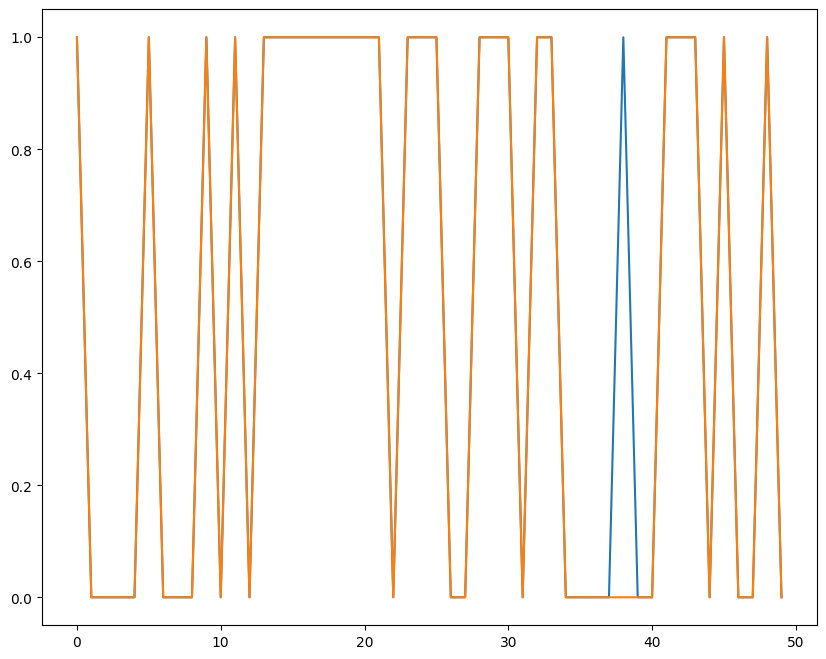

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])

Evaluation

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred , labels=[1 , 0])
conf_mat

array([[19932,   151],
       [  185, 17524]])

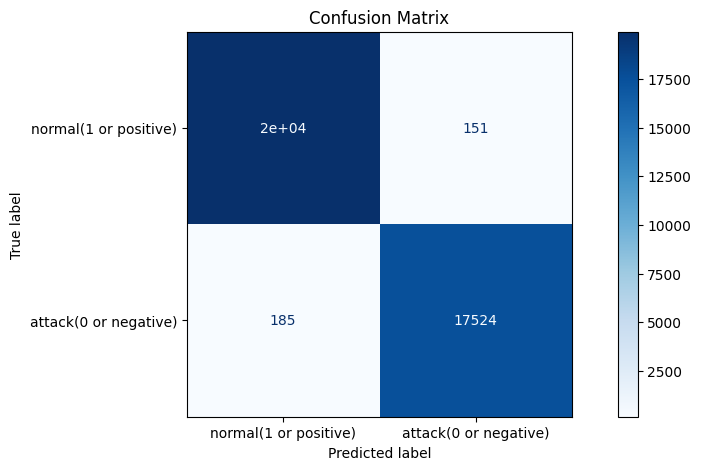

In [ ]:
def plot_confusion_matrix(conf_mat, class_names=["normal(1 or positive)", "attack(0 or negative)"], figsize=(12, 5)):
    """Function to plot a confusion matrix using matplotlib and sklearn libraries."""
    
    # Create the figure and axes objects
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create the ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_names)
    
    # Plot the confusion matrix
    disp.plot(include_values=True, cmap=plt.cm.Blues, ax=ax, xticks_rotation="horizontal")
    
    # Add title and axis labels
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    
    plt.show()
plot_confusion_matrix(conf_mat, class_names=["normal(1 or positive)", "attack(0 or negative)"], figsize=(12, 5))

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Assuming y_test and y_pred contain the true labels and predicted labels respectively

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print("F1-score:", f1)
print("Recall:", recall)
print("Precision:", precision)

F1-score: 0.991641791044776
Recall: 0.9924812030075187
Precision: 0.9908037977829697


In [ ]:
matrixx = classification_report(y_test,y_pred , labels=[1,0] )
print(matrixx)

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     20083
           0       0.99      0.99      0.99     17709

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



Linear

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear') 


# fit classifier to training set
linear_svc.fit(x_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test)


print('Training set score: {:.4f}'.format(linear_svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(x_test, y_test)))

Training set score: 0.9600
Test set score: 0.9572


Polynomial


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly' ,degree = 3 ) 


# fit classifier to training set
poly_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(x_test)


print('Training set score: {:.4f}'.format(poly_svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(poly_svc.score(x_test, y_test)))

Training set score: 0.9922
Test set score: 0.9902


Sigmoid

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid') 


# fit classifier to training set
sigmoid_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(x_test)


print('Training set score: {:.4f}'.format(sigmoid_svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(sigmoid_svc.score(x_test, y_test)))

Training set score: 0.8609
Test set score: 0.8600


RBF with Grid Search

In [ ]:
C_grid = [0.1 , 1, 10 ,100 , 1000]
print(C_grid)
parameters = {'C': C_grid}
gridCV = GridSearchCV(SVC(kernel='rbf', gamma='auto'), parameters, n_jobs=-1)             
gridCV.fit(x_train, y_train)
best_C = gridCV.best_params_['C']

[0.1, 1, 10, 100, 1000]


In [ ]:
print("SVM best C : " + str(best_C))

SVM best C : 100


In [ ]:
# instantiate classifier with default hyperparameters
svc=SVC(C= best_C) 


# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)

print('Training set score: {:.4f}'.format(svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(x_test, y_test)))

Training set score: 0.9976
Test set score: 0.9953


**Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Train and predict.
GNB = GaussianNB()
GNB.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=GNB.predict(x_test)

In [ ]:
# Accuracy.
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy    = ' + str(np.round(accuracy,3)))

Accuracy    = 0.539


In [ ]:
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(20)

,Y_test,Y_pred
0,1,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,1
6,0,1
7,0,1
8,0,1
9,1,1


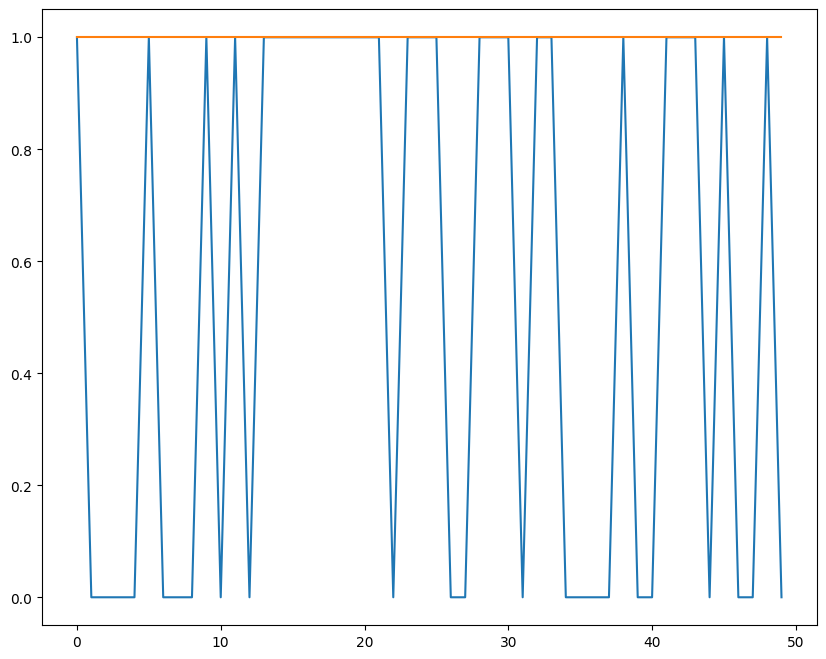

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred , labels=[1 , 0])
conf_mat

array([[20043,    40],
       [17374,   335]])

In [ ]:
plot_confusion_matrix(conf_mat,class_names=[ "normal(1 or positive)" ,"attack(0 or negative)" ],figsize=(12,5))

NameError: ignored

In [ ]:
print(" F1-score",f1_score(y_test,y_pred))
print(" Recall: ",recall_score(y_test,y_pred))
print(" precision: ",precision_score(y_test,y_pred))

 F1-score 0.6971478260869566
 Recall:  0.998008265697356
 precision:  0.5356656065424807


In [ ]:
matrixx = classification_report(y_test,y_pred , labels=[1,0] )
print(matrixx)

              precision    recall  f1-score   support

           1       0.54      1.00      0.70     20083
           0       0.89      0.02      0.04     17709

    accuracy                           0.54     37792
   macro avg       0.71      0.51      0.37     37792
weighted avg       0.70      0.54      0.39     37792



Linear

In [ ]:
# instantiate classifier
linear_gnb = GaussianNB()

# fit classifier to training set
linear_gnb.fit(x_train, y_train)

# make predictions on test set
y_pred_test = linear_gnb.predict(x_test)

print('Training set score: {:.4f}'.format(linear_gnb.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(linear_gnb.score(x_test, y_test)))


Training set score: 0.8759
Test set score: 0.5392


Polynomial


In [ ]:
poly_gnb=SVC(kernel='poly' ,degree = 3 ) 


# fit classifier to training set
poly_gnb.fit(x_train,y_train)


# make predictions on test set
y_pred=poly_gnb.predict(x_test)


print('Training set score: {:.4f}'.format(poly_gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(poly_gnb.score(x_test, y_test)))

Training set score: 0.9922
Test set score: 0.9902


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_gnb=GaussianNB()


# fit classifier to training set
linear_gnb.fit(x_train,y_train)


# make predictions on test set
y_pred_test=linear_gnb.predict(x_test)


print('Training set score: {:.4f}'.format(linear_gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(linear_gnb.score(x_test, y_test)))


Training set score: 0.8759
Test set score: 0.5392


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_gnb=GaussianNB()


# fit classifier to training set
sigmoid_gnb.fit(x_train,y_train)


# make predictions on test set
y_pred=sigmoid_gnb.predict(x_test)


print('Training set score: {:.4f}'.format(sigmoid_gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(sigmoid_gnb.score(x_test, y_test)))


Training set score: 0.8759
Test set score: 0.5392


Sigmoid

RBF with Grid Search

In [ ]:
C_grid = [0.1, 1, 10, 100, 1000]
parameters = {'var_smoothing': C_grid}
gnb = GaussianNB()
gridCV = GridSearchCV(gnb, parameters, n_jobs=-1)
gridCV.fit(x_train, y_train)
best_C = gridCV.best_params_['var_smoothing']

In [ ]:
print("GNB best C : " + str(best_C))

GNB best C : 10


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()


NameError: ignored

In [ ]:
# instantiate classifier with default hyperparameters
gnb = GaussianNB() 

# fit classifier to training set
gnb.fit(x_train, y_train)

# make predictions on test set
y_pred = gnb.predict(x_test)

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))


NameError: ignored